# 1. Problem formulation:

Opis problemu

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
import cmdstanpy

BINS = 20

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
audi_a3_2000ccm_standarized = pd.read_csv("data/audi_data_standarized.csv")
audi_a3_2000ccm_standarized.head()

,Price,Production_year,Mileage_km
0,0.190769,0.739130,0.472726
1,0.037814,0.434783,0.515908
2,0.071804,0.434783,0.713306
3,0.063306,0.391304,0.549999
4,0.076053,0.347826,0.545454


# 2. Model

Opis modeli

## 2.1 Model 1- prior

In [3]:
model_exp_ppc = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model_ppc.stan')

#Parameters
N = len(audi_a3_2000ccm_standarized)
mu_a =0.17
sig_a =0.02
mu_b1 = 0.36
sig_b1 = 0.02
mu_b2 = 0.36
sig_b2 = 0.02

data = {"N": N, 
        "mileage" : np.linspace(0.01,1,N),
        "production_year" : np.linspace(0.01,1,N),
        "mu_a" : mu_a,
        "sig_a" : sig_a,
        "mu_b1" : mu_b1,
        "mu_b2" : mu_b2,
        "sig_b1" : sig_b1,
        "sig_b2" : sig_b2,
        }


sim_exp_fit=model_exp_ppc.sample(data=data)
sim_exp_fit_pd = sim_exp_fit.draws_pd()
sim_exp_fit_pd.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:   1 / 1000 [  0%]  (Sampling)
chain 1 |██▎       | 00:00 Iteration: 300 / 1000 [ 30%]  (Sampling)


chain 1 |███▋      | 00:00 Iteration: 600 / 1000 [ 60%]  (Sampling)




chain 1 |█████     | 00:00 Iteration: 900 / 1000 [ 90%]  (Sampling)
chain 1 |██████████| 00:00 Sampling completed                      
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed                      
chain 4 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,price[1],price[2],price[3],price[4],price[5],price[6],price[7],price[8],...,price[774],price[775],price[776],price[777],price[778],alpha,beta1,beta2,sigma,lambda
0,0.0,0.0,0.014934,0.208671,0.157223,0.280571,0.007159,0.525781,0.084140,0.234573,...,0.199365,0.191821,0.060389,0.391844,0.368536,0.145214,0.363909,0.341253,0.148879,39.9379
1,0.0,0.0,0.168886,0.125879,0.015261,0.239576,0.605146,0.011317,0.085047,0.008286,...,0.098373,0.008825,0.023764,0.345578,0.059591,0.192266,0.356284,0.370906,0.166816,40.3301
2,0.0,0.0,0.009360,0.109959,0.036911,0.055724,0.194383,0.191523,0.028271,0.123204,...,0.080849,0.186493,0.045354,0.560112,0.790726,0.147921,0.383934,0.366034,0.131180,40.0868
3,0.0,0.0,0.200851,0.218220,0.081165,0.264827,0.174360,0.083404,0.137139,0.006137,...,0.254705,0.105328,0.042851,0.064194,0.050041,0.141269,0.371617,0.403688,0.145651,40.0055
4,0.0,0.0,0.067975,0.026301,0.024710,0.033665,0.067543,0.073846,0.054945,0.133229,...,0.022016,0.054283,0.053922,0.018843,0.281722,0.189507,0.347061,0.360525,0.139007,39.8014


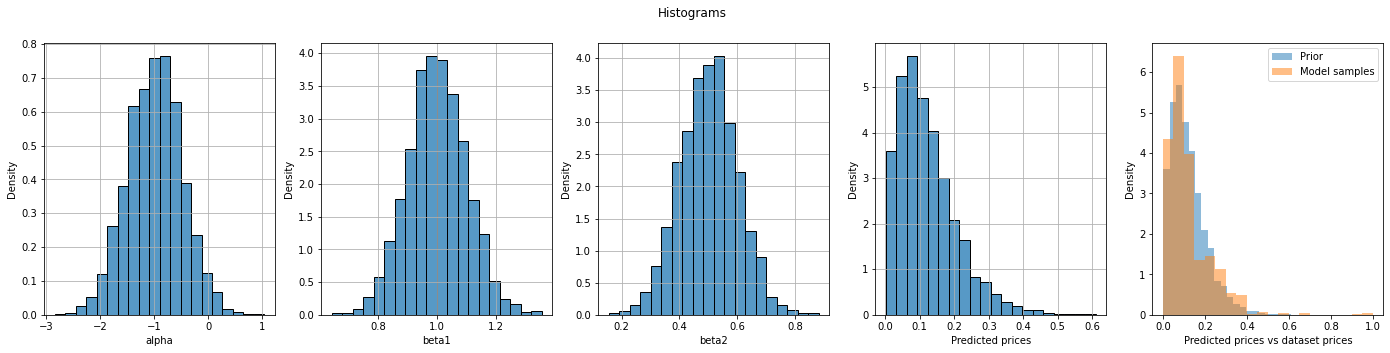

In [27]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="price[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_fit_pd["price[1]"], bins=BINS, alpha=0.5, density=True, label="Prior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

## 2.2 Model 1- posterior

In [28]:
model_exp_fit = cmdstanpy.CmdStanModel(stan_file='stan_files/exp_model_fit.stan')
N = len(audi_a3_2000ccm_standarized)
#Parameters

data = {"N": N, 
        "mileage" : audi_a3_2000ccm_standarized['Mileage_km'],
        "production_year" : audi_a3_2000ccm_standarized['Production_year'],
        "price_observed": audi_a3_2000ccm_standarized['Price']
        }

sim_exp_fit=model_exp_fit.sample(data=data)
sim_exp_fit_pd = sim_exp_fit.draws_pd()
sim_exp_fit_pd.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:00 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:01 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:01 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:01 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:01 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:01 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:01 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:02 Iteration: 1100 / 2000 [ 55%]  (Sampling)


cha


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,log_likelihood[769],log_likelihood[770],log_likelihood[771],log_likelihood[772],log_likelihood[773],log_likelihood[774],log_likelihood[775],log_likelihood[776],log_likelihood[777],log_likelihood[778]
0,559.983,0.722573,0.392866,3.0,7.0,0.0,-557.841,0.204309,0.152555,0.117968,...,1.12818,1.48474,1.12854,1.57392,0.879662,1.24550,0.130384,1.29544,1.47518,0.871166
1,561.320,0.893352,0.392866,3.0,15.0,0.0,-558.178,0.215465,0.125503,0.091254,...,1.12696,1.51330,1.13169,1.63173,0.871149,1.25179,0.119511,1.34507,1.47532,0.863861
2,558.277,0.975068,0.392866,3.0,7.0,0.0,-558.014,0.231941,0.168043,0.108910,...,1.12330,1.52289,1.13213,1.62646,0.858494,1.23324,0.070877,1.33179,1.47252,0.848508
3,560.111,0.954529,0.392866,3.0,11.0,0.0,-554.135,0.208548,0.123352,0.085534,...,1.12868,1.49609,1.12914,1.60469,0.881988,1.25760,0.164413,1.32626,1.47399,0.875952
4,556.918,0.701759,0.392866,4.0,15.0,0.0,-553.894,0.220552,0.134837,0.060057,...,1.12890,1.49350,1.12488,1.58910,0.887752,1.26189,0.215103,1.31179,1.47142,0.883446


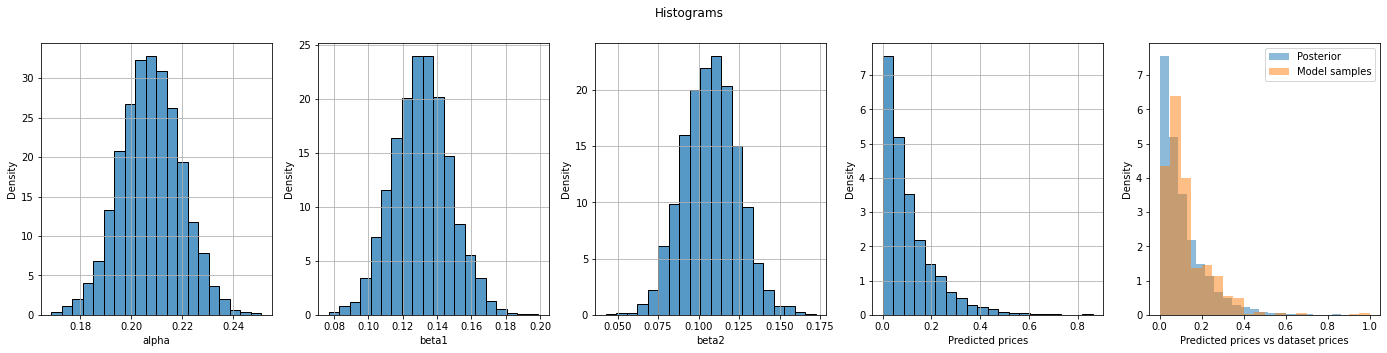

In [6]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="price_estimated[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_fit_pd["price_estimated[1]"], bins=BINS, alpha=0.5, density=True, label="Posterior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

## 2.3 Model 2- prior

In [73]:
model_exp_ppc = cmdstanpy.CmdStanModel(stan_file='stan_files/beta_model_ppc.stan')


INFO:cmdstanpy:compiling stan file /home/DA/project/stan_files/beta_model_ppc.stan to exe file /home/DA/project/stan_files/beta_model_ppc


In [ ]:
#Parameters
N = len(audi_a3_2000ccm_standarized)

data = {"N": N, 
        "mileage" : np.linspace(0.01,1,N),
        "production_year" : np.linspace(0.01,1,N),
        }

sim_exp_fit=model_exp_ppc.sample(data=data)
sim_exp_fit_pd = sim_exp_fit.draws_pd()
sim_exp_fit_pd.head()

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta1,beta2,...,price[769],price[770],price[771],price[772],price[773],price[774],price[775],price[776],price[777],price[778]
0,-2.42686,0.985158,0.706492,2.0,3.0,0.0,3.48864,0.534269,0.592086,0.471351,...,0.820073,0.001199,0.861292,0.428738,0.038471,0.000130,0.552114,0.612259,0.386061,0.272154
1,-3.97324,0.855242,0.706492,3.0,7.0,0.0,4.53449,0.337575,0.455054,0.508578,...,0.266576,0.713690,0.145746,0.000271,0.000003,0.990390,0.033228,0.037561,0.018677,0.445322
2,-3.69048,1.000000,0.706492,2.0,3.0,0.0,4.43545,0.344457,0.555229,0.517139,...,0.050584,0.409546,0.697737,0.134220,0.029251,0.000088,0.941089,0.294120,0.022861,0.000448
3,-3.24414,0.997691,0.706492,2.0,3.0,0.0,3.92673,0.378942,0.553235,0.468593,...,0.464652,0.011956,0.069027,0.000048,0.538261,0.000079,0.330812,0.000200,0.009942,0.251749
4,-3.13864,0.912594,0.706492,2.0,3.0,0.0,5.14088,0.482177,0.570500,0.387304,...,0.961050,0.926767,0.000347,0.012129,0.011688,0.022540,0.962582,0.228969,0.625875,0.171364


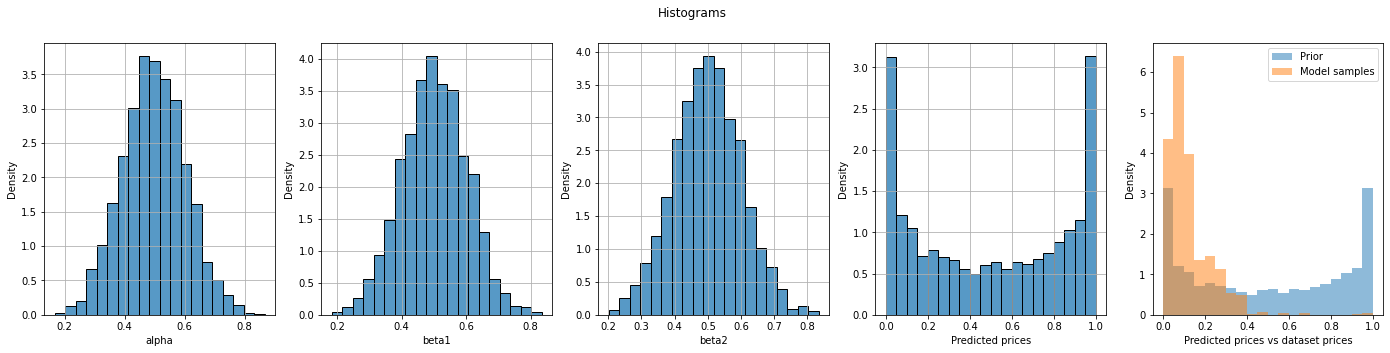

In [ ]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="price[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_fit_pd["price[1]"], bins=BINS, alpha=0.5, density=True, label="Prior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

## 2.4 Model 2- posterior

In [ ]:
model_exp_fit = cmdstanpy.CmdStanModel(stan_file='stan_files/beta_model_fit.stan')
N = len(audi_a3_2000ccm_standarized)
#Parameters

data = {"N": N, 
        "mileage" : audi_a3_2000ccm_standarized['Mileage_km'].values,
        "production_year" : audi_a3_2000ccm_standarized['Production_year'].values,
        "price_observed": audi_a3_2000ccm_standarized['Price'].values
        }

sim_exp_fit=model_exp_fit.sample(data=data)
sim_exp_fit_pd = sim_exp_fit.draws_pd()
sim_exp_fit_pd.head()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/home/DA/project/stan_files/beta_model_fit', 'id=1', 'random', 'seed=87657', 'data', 'file=/tmp/tmpwdm9q6e4/w_m_o359.json', 'output', 'file=/tmp/tmpwdm9q6e4/beta_model_fit-20230711013431_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpwdm9q6e4/beta_model_fit-20230711013431_1.csv
 console_msgs (if any):
	/tmp/tmpwdm9q6e4/beta_model_fit-20230711013431_0-stdout.txt

In [ ]:
_, ax = plt.subplots(1, 5, figsize=(24, 5))
ax = ax.flatten()
sns.histplot(data=sim_exp_fit_pd, x="alpha", stat="density", ax=ax[0], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta1", stat="density", ax=ax[1], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="beta2", stat="density", ax=ax[2], bins=BINS)
sns.histplot(data=sim_exp_fit_pd, x="price_estimated[1]", stat="density", ax=ax[3], bins=BINS)

ax[4].hist(sim_exp_fit_pd["price_estimated[1]"], bins=BINS, alpha=0.5, density=True, label="Posterior")
ax[4].hist(audi_a3_2000ccm_standarized["Price"], bins=BINS, alpha=0.5, density=True, label="Model samples")


ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[3].grid()

ax[0].set_xlabel("alpha"), 
ax[1].set_xlabel("beta1"), 
ax[2].set_xlabel("beta2"), 
ax[3].set_xlabel("Predicted prices"), 
ax[4].set_xlabel("Predicted prices vs dataset prices")

ax[4].set_ylabel("Density")
ax[4].legend()
plt.suptitle("Histograms")
plt.show()

# 3. Model comparison